In [13]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import cv2
import keras
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# DATA_GENERATOR

In [14]:
dir_ = 'C:/e/CRUPA/test/'
img_shape = (256, 256)
images = os.listdir(dir_)

images_info_df = pd.DataFrame(columns=['image_name', 'mass', 'food_type'])
for ind, img in enumerate(images):
    items = img.split('_')
    images_info_df.loc[ind] = [dir_ + img, int(items[0]), items[1]]

mass_list = list(images_info_df['mass'])
mass_list = np.array(mass_list)  # массив с массами

images_in_matrix_form = []  # массив с картинками в матричном виде
for img_name in images_info_df['image_name']:
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_shape)
    images_in_matrix_form.append(img)

images_in_matrix_form = np.array(images_in_matrix_form)

# MODEL

In [16]:
from tensorflow.keras.applications import MobileNet,ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

base_model=ResNet50( weights='imagenet',include_top=False,input_shape=(256,256,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 

output=Dense(1,activation='linear')(x) 

model = Model(inputs=base_model.input, outputs=output)


model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
          

In [17]:
model = keras.models.load_model('C:/e/CRUPA/save/model_v3_1302.h5')

# PREDICT MODEL

In [18]:
def img_array(path_img):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_shape)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    return img

def show_img(path_img):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

(1, 256, 256, 3)
100 -true
[[127.485146]] - predict


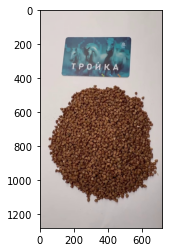

(1, 256, 256, 3)
100 -true
[[126.1191]] - predict


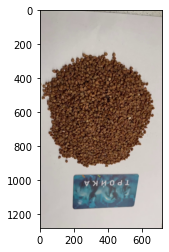

(1, 256, 256, 3)
100 -true
[[110.420906]] - predict


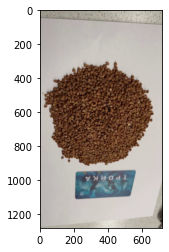

(1, 256, 256, 3)
10 -true
[[19.980787]] - predict


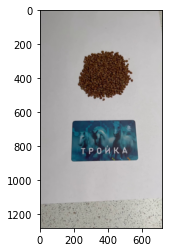

(1, 256, 256, 3)
10 -true
[[39.509964]] - predict


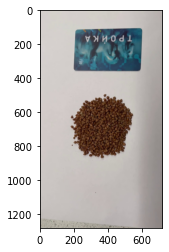

(1, 256, 256, 3)
120 -true
[[112.55203]] - predict


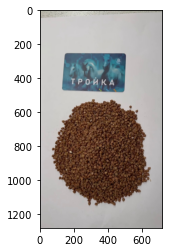

(1, 256, 256, 3)
120 -true
[[94.13743]] - predict


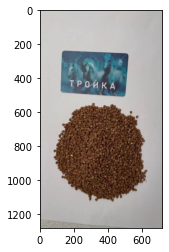

(1, 256, 256, 3)
130 -true
[[151.64395]] - predict


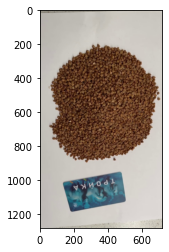

(1, 256, 256, 3)
130 -true
[[159.09003]] - predict


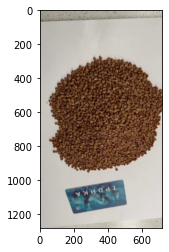

(1, 256, 256, 3)
140 -true
[[133.8275]] - predict


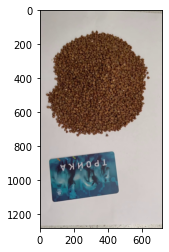

(1, 256, 256, 3)
140 -true
[[158.24197]] - predict


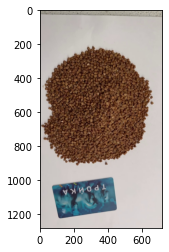

(1, 256, 256, 3)
150 -true
[[150.67328]] - predict


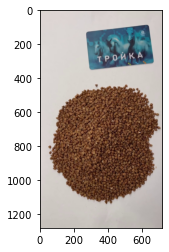

(1, 256, 256, 3)
150 -true
[[144.2991]] - predict


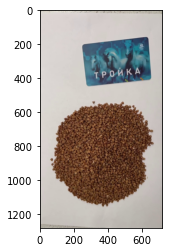

(1, 256, 256, 3)
160 -true
[[151.91595]] - predict


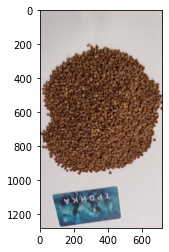

(1, 256, 256, 3)
170 -true
[[139.22675]] - predict


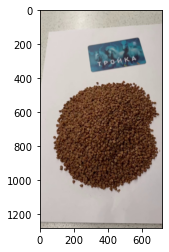

(1, 256, 256, 3)
170 -true
[[179.4863]] - predict


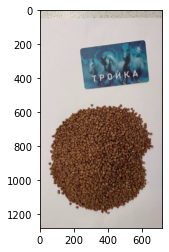

(1, 256, 256, 3)
170 -true
[[128.30562]] - predict


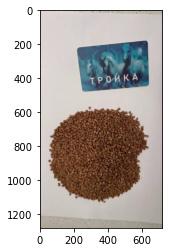

(1, 256, 256, 3)
170 -true
[[103.95124]] - predict


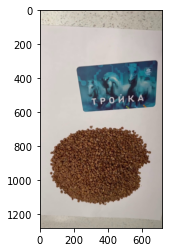

(1, 256, 256, 3)
180 -true
[[137.8968]] - predict


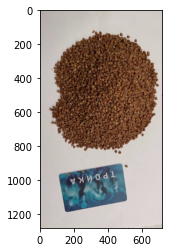

(1, 256, 256, 3)
180 -true
[[120.99867]] - predict


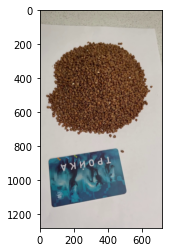

(1, 256, 256, 3)
180 -true
[[162.9079]] - predict


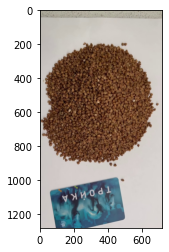

(1, 256, 256, 3)
180 -true
[[160.92194]] - predict


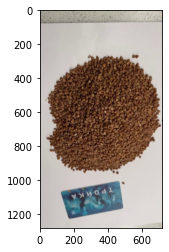

(1, 256, 256, 3)
190 -true
[[128.26314]] - predict


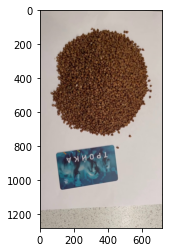

(1, 256, 256, 3)
190 -true
[[128.8848]] - predict


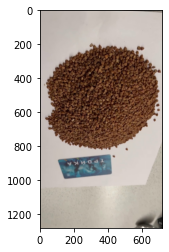

(1, 256, 256, 3)
200 -true
[[137.76036]] - predict


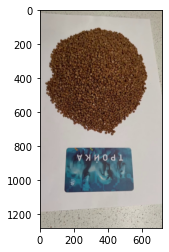

(1, 256, 256, 3)
200 -true
[[154.70076]] - predict


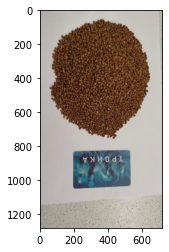

(1, 256, 256, 3)
200 -true
[[136.92719]] - predict


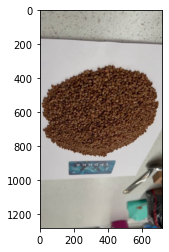

(1, 256, 256, 3)
200 -true
[[151.9946]] - predict


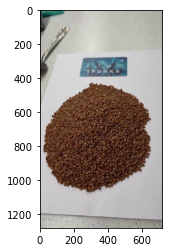

(1, 256, 256, 3)
200 -true
[[122.2208]] - predict


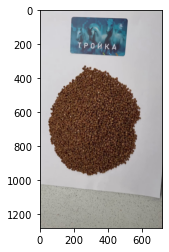

(1, 256, 256, 3)
50 -true
[[116.82963]] - predict


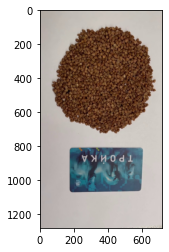

In [22]:
y_pred = []
y_true = []
for i in range(0, 30, 1):
  y_pred.append(pred)
  y_true.append(images_info_df['mass'][i])
  path_img = images_info_df['image_name'][i]
  pred = model.predict(img_array(path_img))
  print(images_info_df['mass'][i], '-true')
  print(pred, '- predict')
  show_img(path_img)

In [23]:
df = pd.DataFrame({'y_predict':y_pred, 'y_true':y_true})
df.to_csv('C:/e/CRUPA/table1.csv')

In [ ]:
sum()

In [24]:
res_df = pd.read_csv('C:/e/CRUPA/table1.csv', sep=',')
res_df['y_predict'] = res_df['y_predict'].apply(lambda x: round(float(x.strip('][')), 1))
res_df['error'] = round(res_df['y_predict'] - res_df['y_true'], 1)
res_df['error_in_%'] = round((res_df['y_predict'] - res_df['y_true']) * 100 / res_df['y_true'], 0)

In [27]:
res_df['error_in_%']

0       17.0
1       28.0
2       26.0
3     1004.0
4      100.0
5      -67.0
6       -6.0
7      -28.0
8       17.0
9       14.0
10      -4.0
11       5.0
12       0.0
13     -10.0
14     -11.0
15     -18.0
16       6.0
17     -25.0
18     -42.0
19     -23.0
20     -33.0
21      -9.0
22     -15.0
23     -32.0
24     -36.0
25     -31.0
26     -23.0
27     -32.0
28     -24.0
29     144.0
Name: error_in_%, dtype: float64

In [28]:
sum(res_df['error_in_%'])/(len(res_df['error_in_%']))

29.733333333333334